# Building and analyzing mathematical models in Jupyter

[<--Back to Jupyter intro ](Jupyter-intro.ipynb)

## Introduction

Jupyter is a fully-functional alternative to Mathematica or Maple notebooks for developing and analyzing mathematical models in biology (or any other discipine, for that matter). For this, you will need to use a [Computer Algebra System](https://en.wikipedia.org/wiki/Computer_algebra_system) (CAS). A CAS is software that emulates manual (pen-and-paper) manipulations of mathematical expressions. Yes, it can be done, and very effectively, for a vast array of mathematical problems! A CAS combined with a graphing/plotting package like matplotlib gives you a powerful tool for mathematical modelling using a Jupyter notebook.

We will use Python's [SymPy](http://sympy.org/en/index.html) package, which provides powerful CAS features for most common mathematical modelling problems. 

There is also [Sage](http://www.sagemath.org/), a more capable CAS. We will not use it here because is not a regular Python package, but rather, uses Python as its programming language. So unlike SymPy it cannot just be loaded in a Jupyter nb with a Python kernel. Instead, you will need to [install its Jupyter kernel](http://doc.sagemath.org/html/en/reference/repl/sage/repl/ipython_kernel/install.html). You can [install and try sage](http://www.sagemath.org/download.html) outside of Jupyter if you want.

So let's use SymPy in Jupyter. First, some imports (assuming you are using the Python kernel): 

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
import scipy as sc
init_printing()

If you used [Anaconda](http://continuum.io/downloads) to install Jupyter, it should alreasy include SymPy, Matplotlib, IPython, NumPy, and other useful packages for scientific computing. If you don't have SymPy for some other reason, install it in Linux/mac using: 
```bash
$ sudo apt-get install python-sympy
```
Otherwise, follow the instructions [here](http://docs.sympy.org/latest/install.html). 

## Some preliminaries

Before we get started with our mathematical modelling session in Jupyter, some SymPy preliminaries. 

### Symbolic variables

In CAS' like SymPy, we need to create symbolic variables for the mathematical variables we want to work with. A new symbolic variable can be created using `var`. Try this:

In [74]:
x = var('x')
type(x) # check it's class

sympy.core.symbol.Symbol

You can also define multiple symbolic variables at one go:

In [75]:
a, b, c = var("a, b, c")

For more info on symbolic variables, [have a look at this](http://docs.sympy.org/latest/gotchas.html#variables).

It is often important to add assumptions (constraints) to our symbolic vars:

In [76]:
x = var('x', real=True)

Now check:

In [68]:
x.is_imaginary

False

In [69]:
x = Symbol('x', positive=True)

Again, check:

In [70]:
x > 0

In [71]:
x < 0

### Symbolic equations

We can define the mathematical equations (functions) that we will be using/manipulating as follows:  

In [30]:
MyFun = (pi + x)**2; MyFun

See the nice $\LaTeX$ - formatted output: this is where `init_printing()` comes handy. 

<div style="padding:6px;background-color:cornsilk;line-height:1.4;">
SymPy has predefined expressions for a number of mathematical constants, such as: `pi` ($\pi$), `e` (exponential), `oo` (infinity).
</div> 

You can also get your equation in latex syntax! Try:

In [31]:
latex(MyFun)

'\\left(x + \\pi\\right)^{2}'

That has extra escape slashes for Python to be able to parse it correctly. To display it in its actual form (that you can directly use in a $\LaTeX$ document), `print` it: 

In [32]:
print(latex(MyFun))

\left(x + \pi\right)^{2}


### Numerical evaluation

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits.

In [33]:
pi.evalf(n=100) # pi to a 100 places after decimal!

`N()` is shorthand alias for `evalf()`:

In [34]:
N(pi, 50)

So let's try evaluating our function:

In [35]:
N(MyFun, 5)

When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [36]:
MyFun.subs(x, 1.5)

Now let's evauate it:

In [37]:
N(MyFun.subs(x, 1.5))

The `subs` function can also be used to substitute mathematical variables or expressions. Let's substitute $x$ with $a+\pi$:

In [38]:
MyFun.subs(x, a+pi)

And assign it as a new symbolic equation for using later:

In [49]:
MyFun_new = MyFun.subs(x, a+pi); MyFun_new

We can also numerically evaluate the function over a range of values using NumPy arrays:

In [40]:
x_vec = sc.arange(0, 10, 0.1)

In [56]:
MyFun_vec = sc.array([N((MyFun).subs(x, xx)) for xx in x_vec]) #Note: using a list comprehension!

We can also evaluate the new function `MyFun_new` we created by substitution above:

In [ ]:
MyFun_new_vec = sc.array([N((MyFun_new).subs(a, xx)) for xx in x_vec])

Now plot the two functions that you evaluated (try adding axes and a legend to these basic plots). 

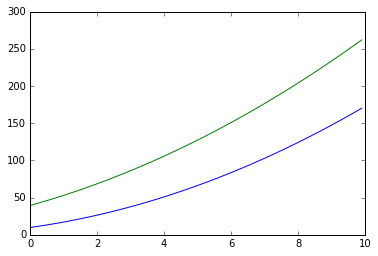

In [77]:
fig, ax = plt.subplots()
ax.plot(x_vec, MyFun_vec)
ax.plot(x_vec, MyFun_new_vec)

However, numerical evaluation using `evalf()` can be very slow. There is a much more efficient way to do it by using [`lambdify()`](http://docs.sympy.org/latest/modules/utilities/lambdify.html) to "compile" a Sympy expression into a function that is much more efficient to evaluate numerically:

In [43]:
MyFun_lamb = lambdify([x], MyFun, 'numpy') 

The first argument is a (python) list of variables that `MyFun_lamb` will be a function of. In this case its only $x$. Now we can directly pass a numpy array and MyFun is evaluated more efficiently:

In [44]:
MyFun_vec = MyFun_lamb(x_vec)

The speedup when using "lambdified" functions instead of direct numerical evaluation can be significant, often several orders of magnitude. Even in this simple example we get a significant speed up:

In [45]:
%%timeit #remember this?

MyFun_vec = sc.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

12.4 ms ± 51 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
%%timeit

MyFun_vec = MyFun_lamb(x_vec)

1.31 µs ± 8.92 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Fundamental mathematical operations 

Let's look at some fundamental methematical operations in SymPy that you will almost certainly use at some point in biological models. You can find a full list and addtional tutorials and examples at [SymPy documentation](http://docs.sympy.org/latest/index.html).  

### Expand and factor

In [94]:
expand(MyFun)

The `expand` function takes a number of keywords arguments which we can tell the functions what kind of expansions to want to perform; use `help(expand)` (or the [SymPy documentation](http://docs.sympy.org/latest/index.html)) for more info.

You can also orint the result of an manipulation in its raw python form:  

In [97]:
print(expand(MyFun))

x**2 + 2*pi*x + pi**2


You can also factor using, well, `factor()`:

In [98]:
factor(x**2 + 2*pi*x + pi**2)

### Apart and together

To manipulate symbolic expressions of fractions, you can use the `apart` and `together` functions:

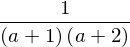

In [85]:
f1 = 1/((a+1)*(a+2)); f1

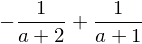

In [86]:
apart(f1)

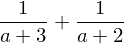

In [90]:
f2 = 1/(a+2) + 1/(a+3); f2

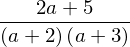

In [91]:
together(f2)

### Simplification

The `simplify` tries to simplify an expression into a nice looking expression, using various techniques. More specific alternatives to the `simplify` functions also exist: `trigsimp`, `powsimp`, `logcombine`, etc. Applying `simplify` to the above example will give the same result as `together`: 

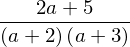

In [92]:
simplify(f2)

Note that simplify usually combines fractions but does not factor. 

In addition to algebraic manipulations, the other main use of CAS is to do calculus, like derivatives and integrals of algebraic expressions.

### Differentiation

Differentiation is usually simple. Use the `diff` function. The first argument is the expression to take the derivative of, and the second argument is the symbol by which to take the derivative:

In [108]:
diff(MyFun_new, a)

For higher order derivatives we can do:

In [109]:
diff(MyFun_new, a, a)

In [110]:
diff(MyFun_new**2, a, 2) # same as above

You can directly apply another manipulation to the result of a previous operation:

In [135]:
expand(diff(MyFun_new**2, a, 2))

Calculate the derivative of a multivariate expression:

In [136]:
x, y, z = var("x,y,z")

In [137]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [138]:
diff(f, x, 1, y, 2)

### Integration

Integration is done in a similar fashion:

In [116]:
MyFun

In [117]:
integrate(MyFun, x)

By providing limits for the integration variable we can evaluate definite integrals:

In [118]:
integrate(MyFun, (x, -1, 1))

and also improper integrals

In [122]:
integrate(exp(-x**2), (x, -oo, oo))

Remember, `oo` is the SymPy notation for inifinity.

### Sums and products

You can evaluate sums and products using `Sum`. Noyte that tjhis function is named `Sum` and not `sum` to avoind namespace conflict.

In [140]:
n = var("n")

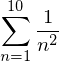

In [141]:
Sum(1/n**2, (n, 1, 10))

In [142]:
Sum(1/n**2, (n,1, 10)).evalf()

In [62]:
Sum(1/n**2, (n, 1, oo)).evalf()

Products work much the same way:

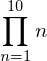

In [126]:
Product(n, (n, 1, 10)) # 10!

### Limits

Limits can be evaluated using the `limit` function. For example, 

In [127]:
limit(sin(x)/x, x, 0)

We can use 'limit' to check the result of derivation using the `diff` function:

In [128]:
f

In [129]:
diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [131]:
h = var("h")

In [68]:
limit((f.subs(x, x+h) - f)/h, h, 0)

OK!

We can change the direction from which we approach the limiting point using the `dir` keywork argument:

In [132]:
limit(1/x, x, 0, dir="+")

In [133]:
limit(1/x, x, 0, dir="-")

### Series

Series expansion is also one of the most useful features of a CAS. In SymPy we can perform a series expansion of an expression using the `series` function:

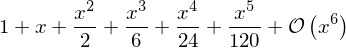

In [149]:
series(exp(x), x) # this is a classic!

By default it expands the expression around $x=0$, but we can expand around any value of $x$ by explicitly include a value in the function call:

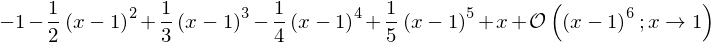

In [151]:
series(exp(x), x, 1)

Or try:

In [155]:
series(log(x), x, 0) # will not work why?

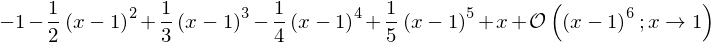

In [156]:
series(log(x), x,1) # this will work, however 

And we can explicitly define to which order the series expansion should be carried out:

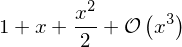

In [161]:
series(exp(x), x, 0, 3)

Another way to do the same:

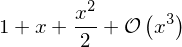

In [163]:
exp(x).series(x,0,3)

The series expansion includes the order of the approximation, which is very useful for keeping track of the order of validity when we do calculations with series expansions of different orders:

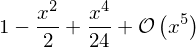

In [167]:
s1 = cos(x).series(x, 0, 5); s1

In [171]:
s2 = sin(x).series(x, 0, 2); s2

In [169]:
expand(s1 * s2)

If we want to get rid of the order information we can use the `removeO` method:

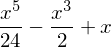

In [172]:
expand(s1.removeO() * s2.removeO())

### Matrix algebra

Matrices are defined using the `Matrix` class:

In [174]:
m11, m12, m21, m22 = var("m11, m12, m21, m22")
b1, b2 = var("b1, b2")

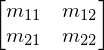

In [176]:
A = Matrix([[m11, m12],[m21, m22]]) # Again, note: capital M for to avoid namespace conflict 
A

In [177]:
b = Matrix([[b1], [b2]]); b

With `Matrix` class instances we can do the usual matrix algebra operations:

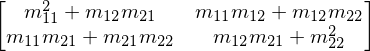

In [178]:
A**2

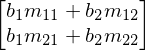

In [179]:
A * b

And calculate determinants and inverses, and the like:

In [180]:
A.det()

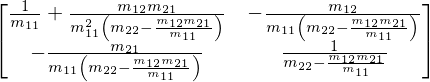

In [181]:
A.inv()

### Solving equations

For solving equations and systems of equations we can use the `solve` function:

In [184]:
solve(x**2 - 1, x)

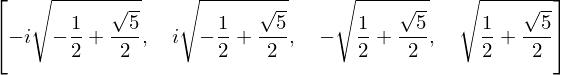

In [185]:
solve(x**4 - x**2 - 1, x)

System of equations:

In [186]:
solve([x + y - 1, x - y - 1], [x,y])

In terms of other symbolic expressions:

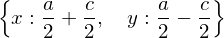

In [187]:
solve([x + y - a, x - y - c], [x,y])

## Some biological examples

Here are some examples of development and analysis of mathematical models in biology.

### Exponential growth

In [206]:
r_m, N, N0, t, t0 = var("r_m N N0 t t0")

In [209]:
dN_dt = r_m*N

In [208]:
integrate(dN_dt, (x, t0, oo))

TypeError: 'module' object is not callable

### Logistic Population growth

The classical equation for logistic growth in population density ($M$) is, 

\begin{equation}
	\frac{\text{d}M}{\text{d}t} = r_m M \left(1-\frac{M}{K}\right)
\end{equation}

where $r_m$ is the population growth rate, $K$ is the carrying capacity of the environment. This has the time-dependent solution:

\begin{equation}
	M_t = \frac{M_0K\mathrm{e}^{r_mt}}{K+M_0(\mathrm{e}^{r_m t}-1)}
\end{equation}


### The Lotka-Volterra Model

Now for the classical lotka-volterra model that you encountered in advanced Python week.

Integration successful.


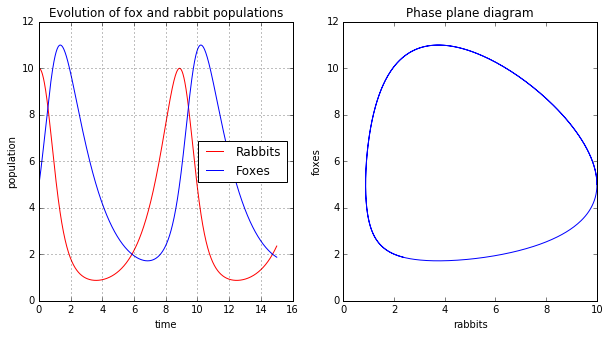

In [197]:
from scipy import integrate

a, b, c, d = var("a b c d")

a, b, c, d = 1., 0.2, 0.6, 0.8 # alpha, beta, gamma, delta

def dX_dt(X, t=0):
    "Gives back eq1 and eq2 results"
    arr = sc.array([ a*X[0] -   b*X[0]*X[1],
                  -c*X[1] + d*b*X[0]*X[1] ])
    return arr

t = sc.linspace(0, 15,  1000) 
X0 = sc.array([10, 5]) # initial population

X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
print(infodict['message'] )

rabbits, foxes = X.T

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')
plt.subplot(1, 2, 2)
# phase diagram
plt.plot(rabbits, foxes)
plt.xlabel('rabbits')
plt.ylabel('foxes')
plt.title('Phase plane diagram')

## Further reading

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.